## Imports

In [62]:
# utils
import os
import sys
from pathlib import Path
PROJECT_DIR = Path.cwd().parent
sys.path.append(str(PROJECT_DIR))

# basics
import numpy as np
import pandas as pd

# viz
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.lines as mlines

# metrics
from utils import config
from utils.reader import read_file_yaml

np.random.seed(0)

In [91]:
params = read_file_yaml(file_path_parameters)
path_root = (
    PROJECT_DIR
    / "results"
)
path_conf = (
    PROJECT_DIR
    / "conf"
)
file_path_parameters = (
    path_conf 
    / "parameters.yml"
)
path_outputs = (
    PROJECT_DIR
    / "outputs"
)
if not os.path.exists(path_outputs):
    os.makedirs(path_outputs)
    
file_path_simulation_plot = (
    path_outputs
    / params["outputs"]["simulation_random"]["filepath"]
)
    
file_path_plot_i_dataset = (
    path_outputs
    / params["outputs"]["simulation_random"]["data_filepath"]
)
n_random = np.sort([int(i.replace("random_n",""))for i in os.listdir(path_root)])
path_random = [
    "random_n"+str(i) for i in n_random
]
path_results = [path_root / i for i in path_random]

In [87]:
under_line = "\n{}\n"
title_part_n2 = "PROJECT_DIR: [ {} ]".format(PROJECT_DIR)
title_part_n3 = under_line.format(
    "".join(["-"]*len(title_part_n2))
)
title_part_n1 = under_line.format(
    "".join(["-"]*len(title_part_n2))
)
print(title_part_n1 + title_part_n2 + title_part_n3)


----------------------------------------------------
PROJECT_DIR: [ /home/manuel/aaai-claire-clustering ]
----------------------------------------------------



## Read

In [92]:
parameters = read_file_yaml(file_path_parameters)

In [127]:
metrics = {
    name: {
        dataset: pd.read_csv(
            url / dataset / "metrics" / "metrics.csv",
            index_col = 0
        ) for dataset in os.listdir(url)
    }
    for name, url in zip(path_random, path_results)
}

## Concat all results

In [133]:
data = (
    metrics["random_n1"]["aniso"]
    .T
    .filter(regex = "^(?!.*random_model)")
    .T[["abilities"]]
    .reset_index()
)
data.rename(columns = {
    "abilities": "n1_aniso",
    "index": "model"
}, inplace = True)

for random_n, content_n in metrics.items():
    for name, content_dataset in content_n.items(): 
        if (random_n == "random_n1")and(name == "aniso"):
            continue
        tmp = (
            content_dataset
            .T
            .filter(regex = "^(?!.*random_model)")
            .T[["abilities"]]
            .reset_index()
        )
        tmp.rename(columns = {
            "abilities": "n{}_{}".format(
                random_n.replace("random_n",""),
                name
            ),
            "index": "model"
        }, inplace = True)
        data = data.merge(tmp, on = ["model"])
data.set_index("model", inplace = True)

In [135]:
datasets = {}
for i in config.file_names:
    datasets[i] = data.filter(regex = r"{}".format(i))
    datasets[i].columns = datasets[i].columns.str.replace("_"+i, "")

In [136]:
data

,n1_aniso,n1_no_structure,n1_noisy_circles,n1_blobs,n1_varied,n1_noisy_moons,n2_aniso,n2_no_structure,n2_noisy_circles,n2_blobs,...,n34_noisy_circles,n34_blobs,n34_varied,n34_noisy_moons,n35_aniso,n35_no_structure,n35_noisy_circles,n35_blobs,n35_varied,n35_noisy_moons
model,,,,,,,,,,,,,,,,,,,,,
optimal_clustering,0.508652,0.513672,0.502213,0.508402,0.519639,0.491923,0.508848,0.513751,0.504158,0.528802,...,0.520535,0.533816,0.532224,0.523454,0.524684,0.518528,0.520441,0.544630,0.532130,0.523556
spectral_clustering_n_clusters_3_eigen_solver_arpack_affinity_nearest_neighbors,0.505494,0.504133,0.492318,0.508402,0.515755,0.481903,0.505901,0.504156,0.494396,0.430768,...,0.515333,0.532823,0.527362,0.518795,0.517162,0.506822,0.515527,0.486657,0.527077,0.518919
dbscan_eps_0_2_min_samples_2,0.504517,0.437257,0.482670,0.507853,0.505061,0.483060,0.505001,0.436009,0.485384,0.528249,...,0.510312,0.532724,0.528625,0.519146,0.517138,0.439485,0.510379,0.543315,0.528579,0.519296
kernel_kmeans_n_clusters_3_kernel_gak_random_state_0,0.503577,0.502722,0.482458,0.508402,0.516287,0.474061,0.504027,0.503105,0.485068,0.528802,...,0.510289,0.532823,0.527410,0.514723,0.515979,0.508191,0.511057,0.543406,0.527131,0.514909
kmeans_n_clusters_3,0.502232,0.502072,0.484309,0.508402,0.516456,0.474764,0.502817,0.502481,0.486413,0.528802,...,0.511286,0.532823,0.527143,0.515078,0.515374,0.507773,0.511348,0.543406,0.526878,0.515392
kmeans_n_clusters_4,0.498507,0.510178,0.490438,0.489736,0.515805,0.476042,0.499385,0.510773,0.492430,0.513200,...,0.513996,0.532736,0.530847,0.515493,0.518306,0.516677,0.514229,0.543207,0.530660,0.515787
kernel_kmeans_n_clusters_2_kernel_gak_random_state_0,0.496734,0.492091,0.473353,0.442239,0.493728,0.473729,0.496916,0.491799,0.475965,0.461585,...,0.505372,0.488386,0.503710,0.514372,0.496549,0.493537,0.505642,0.492873,0.503372,0.514670
spectral_clustering_n_clusters_2_eigen_solver_arpack_affinity_nearest_neighbors,0.496629,0.485398,0.482661,0.384614,0.490359,0.482880,0.496613,0.485358,0.485375,0.399821,...,0.510309,0.488386,0.503644,0.519066,0.495823,0.490338,0.510375,0.465454,0.503284,0.519211
kernel_kmeans_n_clusters_4_kernel_gak_random_state_0,0.496285,0.510394,0.490215,0.488720,0.516126,0.475147,0.497661,0.510982,0.491455,0.513076,...,0.513789,0.532478,0.530728,0.515329,0.517006,0.516634,0.514158,0.543180,0.530523,0.515433


## Plots

In [137]:
models = list(config.models.keys())+["average_model", "optimal_clustering"]
gray_scale = [str(i/len(models)) for i in range(1, len(models))]
colors = plt.cm.coolwarm(np.linspace(0, 1, len(models)))
markers = list(mlines.Line2D.markers.keys())

_params = {
    _model: {
        "color": colors[_idx],
        "marker": markers[_idx],
        "linestyle": '--' 
    } for _idx, _model in enumerate(models)
}
handler_lines = [
    Line2D([], [], 
           color = param["color"],
           linestyle = param["linestyle"],
           marker = param["marker"]) for param in _params.values()
    ]

In [147]:
## by dataset
figs_dataset = {}
for name, content in datasets.items():
    _fig, ax = plt.subplots(1, 1, figsize=(20, 8))
    
    for line_name, line_data in content.iterrows():
        for idx, i in enumerate(models):
            if i in line_name:
                _line_index = []
                for k in line_data.index.str.split("n"):
                    _line_index.append("$p_{("+k[1]+")}$")
                linestyle = '--'
                ax.plot(_line_index, line_data, **_params[i])
                _line_index = []
    ax.grid(True)
    ax.set_title(name)
    ax.set_ylabel("$abilities$")
    ax.set_xlabel('$n\_random\_model$')
    ax.legend(handler_lines, models, loc='upper left', bbox_to_anchor=(1.00, 1.0))
    figs_dataset[name] = _fig
    plt.ioff()

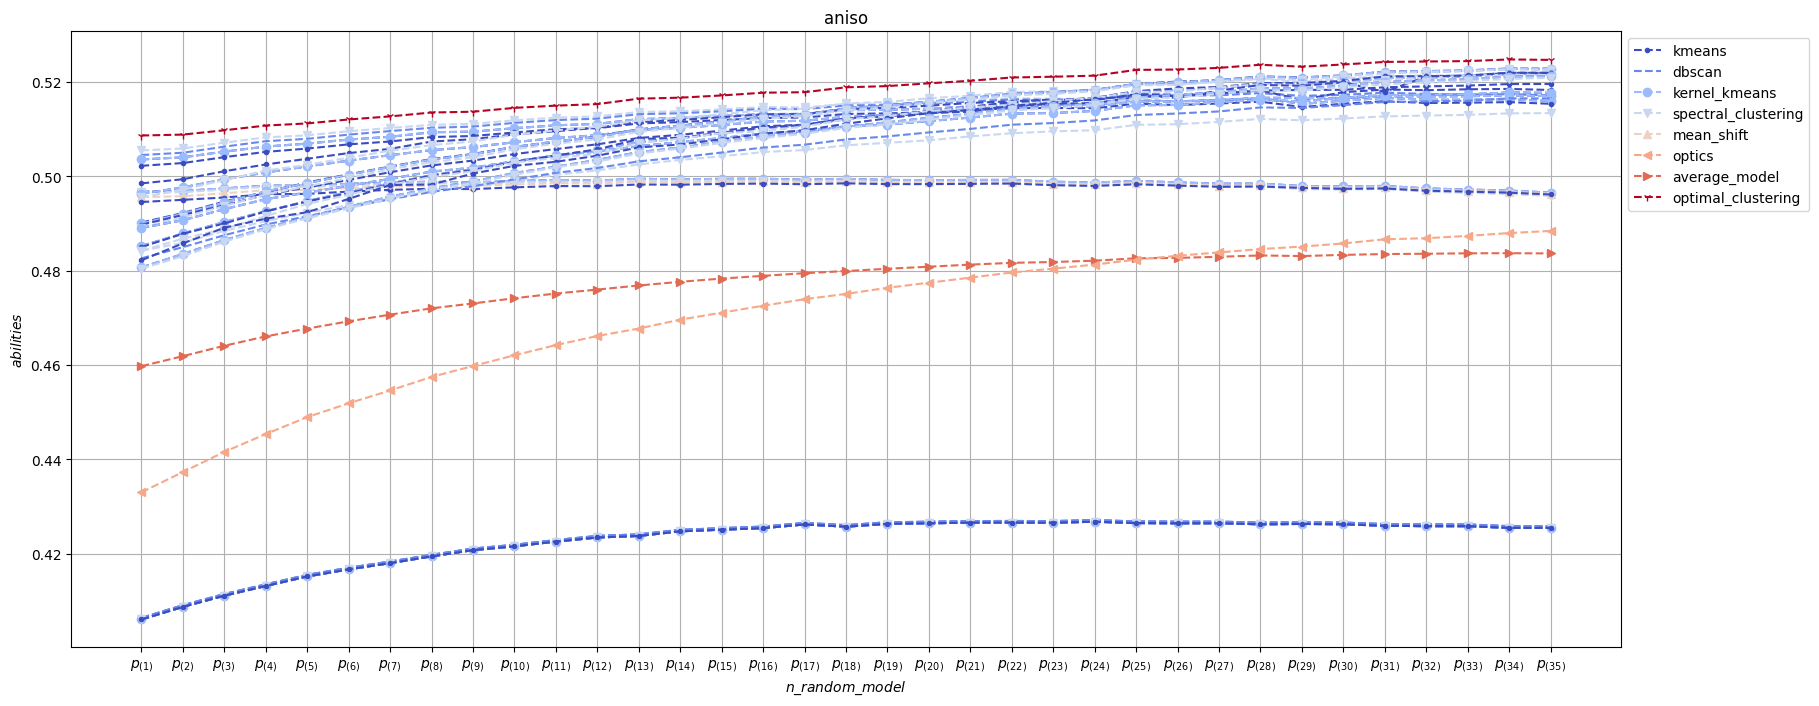

In [148]:
figs_dataset["aniso"]

In [149]:
## global plot
fig, axes = plt.subplots(len(datasets.keys()), 1, figsize=(20, 8*len(datasets)))

if not isinstance(axes, np.ndarray):
    axes = [axes]

for ax, (name, content) in zip(axes, datasets.items()):
    for line_name, line_data in content.iterrows():
        for idx, i in enumerate(models):
            if i in line_name:
                _line_index = []
                for k in line_data.index.str.split("n"):
                    _line_index.append("$p_{("+k[1]+")}$")
                linestyle = '--'
                ax.plot(_line_index, line_data, **_params[i])
                _line_index = []
    ax.grid(True)
    ax.set_title(name)
    ax.set_ylabel("$abilities$")

axes[-1].set_xlabel('$n\_random\_model$')
handler_lines = [Line2D([], [], color=param["color"], linestyle=param["linestyle"], marker=param["marker"]) for param in _params.values()]
axes[0].legend(handler_lines, models, loc='upper left', bbox_to_anchor=(1.00, 1.0))
plt.ioff()

## Save

In [150]:
fig.savefig(str(file_path_simulation_plot)+".eps") # save eps format
fig.savefig(str(file_path_simulation_plot)+".png") # save png format

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [151]:
for name, content in figs_dataset.items():
    content.savefig(str(file_path_plot_i_dataset).format(name)+".eps") # save eps format
    content.savefig(str(file_path_plot_i_dataset).format(name)+".png") # save png format

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
